# Google Search Analysis
![google-thumb-365-1516643550[1].jpg](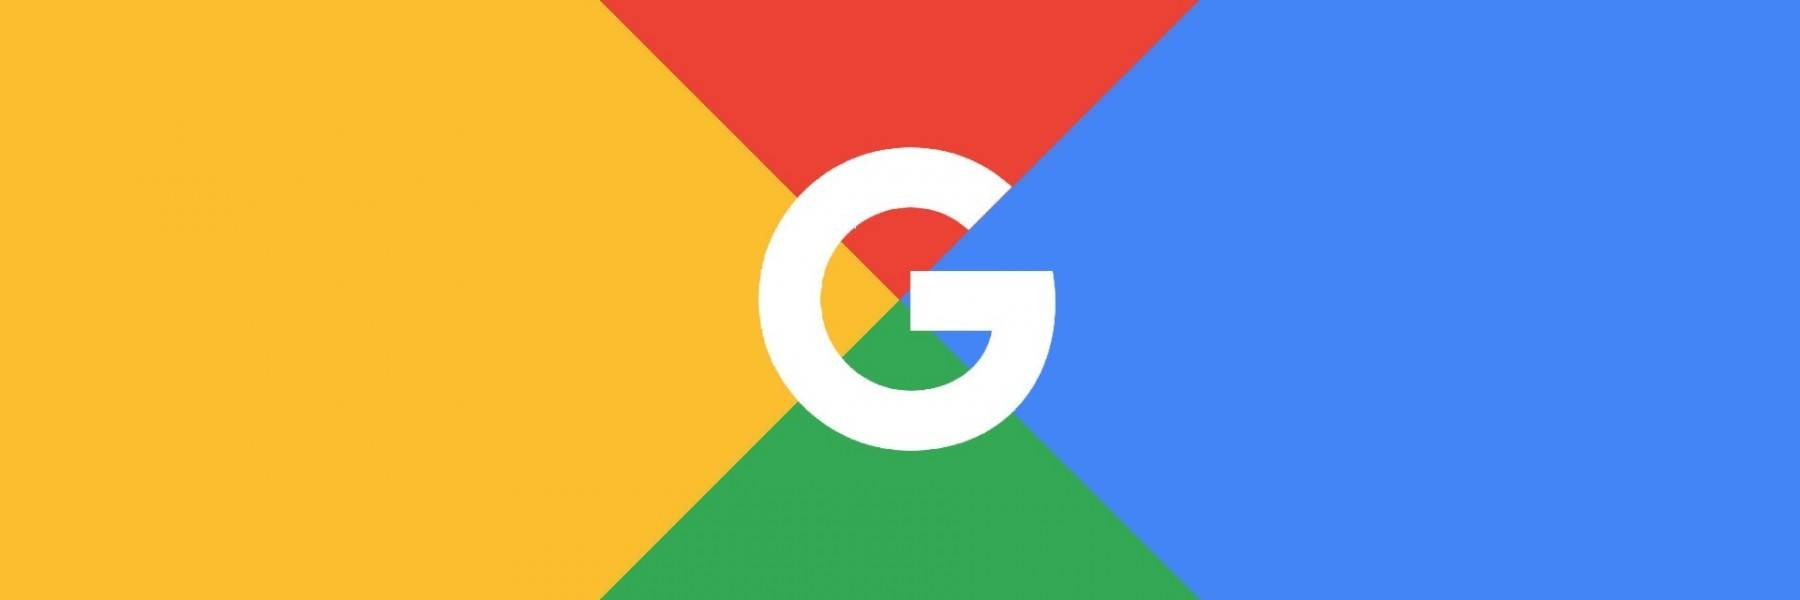)

## Libraries

In [2]:
pip install pytrends

In [3]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
trends = TrendReq()

## Load Data

In [4]:
trends.build_payload(kw_list=["Machine Learning"])
data = trends.interest_by_region()
data = data.sort_values(by="Machine Learning", ascending=False)
data = data.head(10)
print(data)

             Machine Learning
geoName                      
China                     100
Ethiopia                   58
Singapore                  53
India                      45
Tunisia                    32
Sri Lanka                  31
Pakistan                   30
Hong Kong                  29
South Korea                29
Nepal                      26


## EDA

In [5]:
data.describe()

,Machine Learning
count,10.000000
mean,43.300000
std,22.832968
min,26.000000
25%,29.250000
50%,31.500000
75%,51.000000
max,100.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, China to Nepal
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Machine Learning  10 non-null     int64
dtypes: int64(1)
memory usage: 160.0+ bytes


In [7]:
data.isnull().sum()

,0
Machine Learning,0


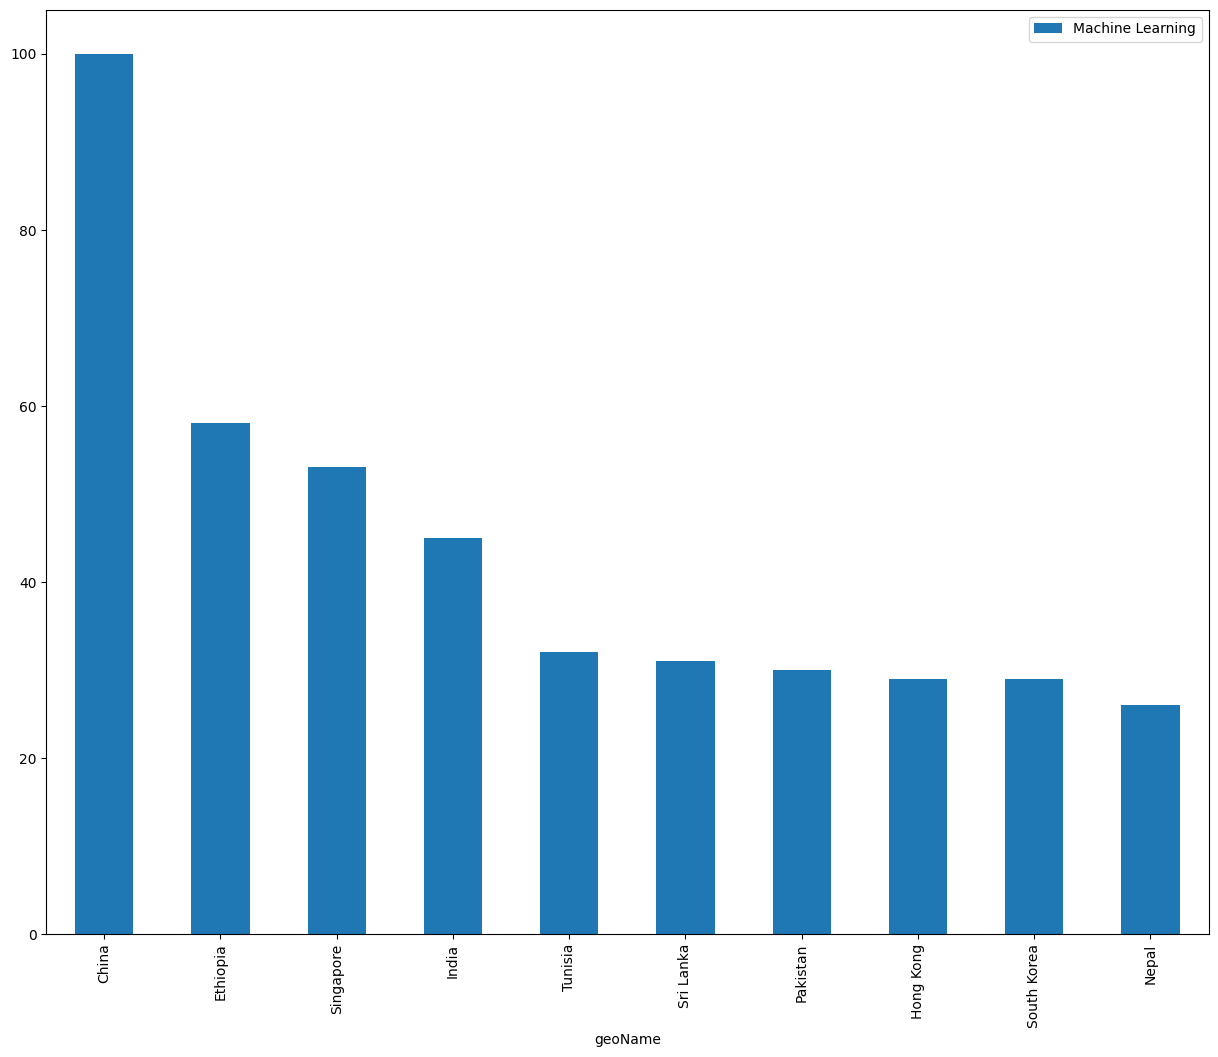

In [8]:
data.reset_index().plot(x="geoName",
                        y="Machine Learning",
                        figsize=(15,12), kind="bar")
plt.style.use('fivethirtyeight')
plt.show()

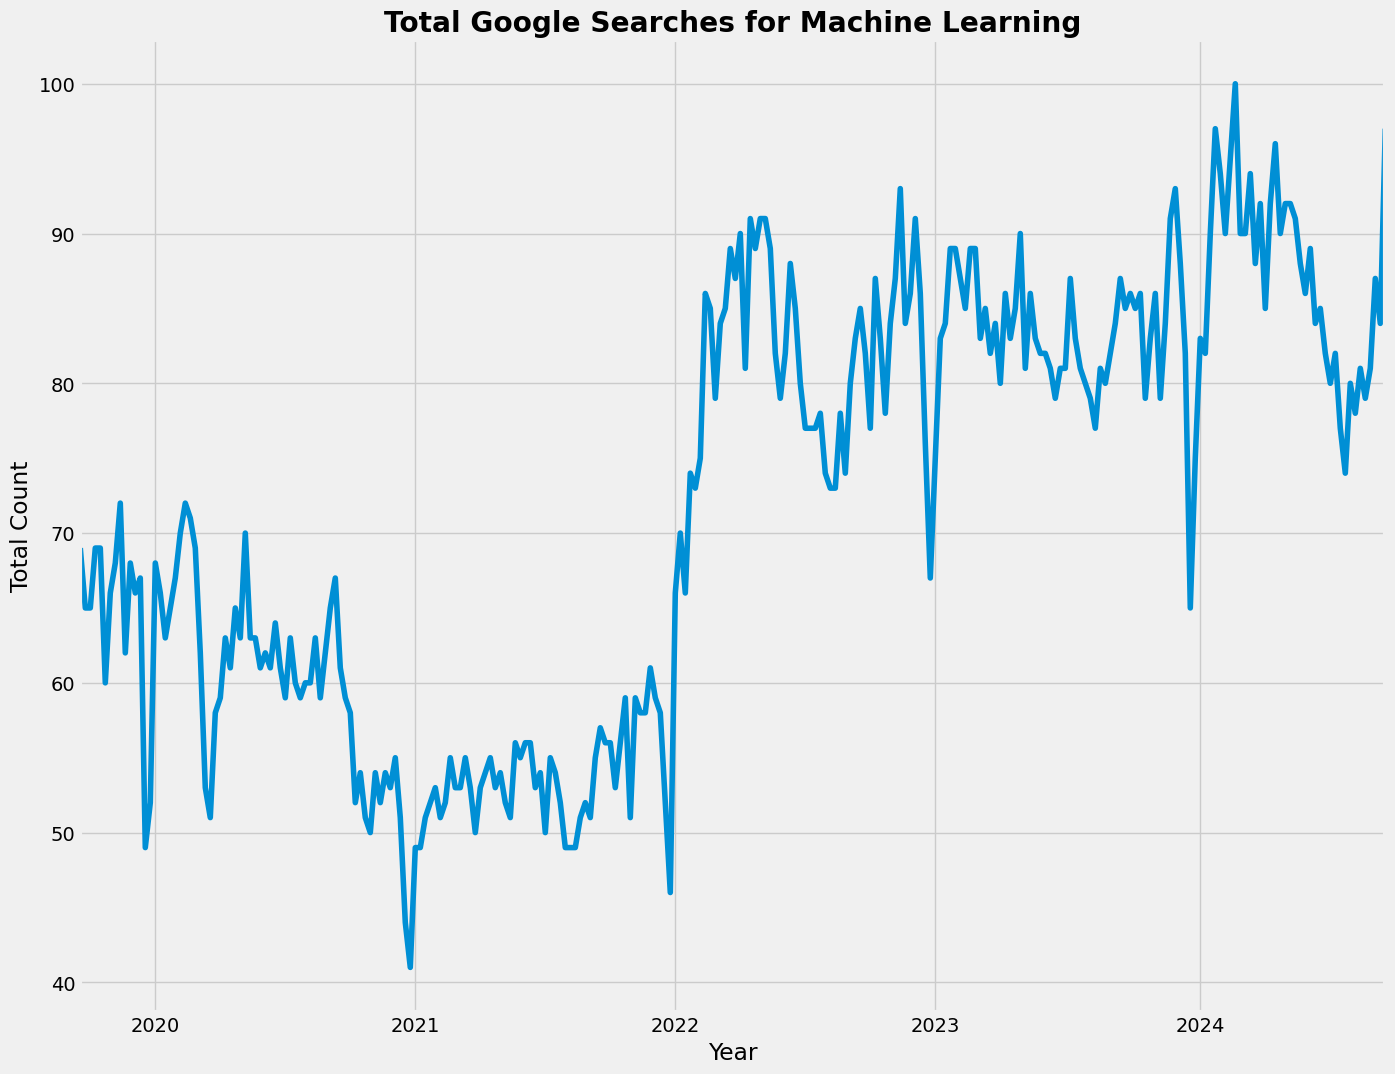

In [9]:
data = TrendReq(hl='en-US', tz=360)
data.build_payload(kw_list=['Machine Learning'])
data = data.interest_over_time()
fig, ax = plt.subplots(figsize=(15, 12))
data['Machine Learning'].plot()
plt.style.use('fivethirtyeight')
plt.title('Total Google Searches for Machine Learning',
          fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.show()

In [72]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

data['Date'] = data.index

x, y = data.drop(columns=['Machine Learning','isPartial'], axis=1), data['Machine Learning']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    layers.Dense(units=64, activation='relu', input_shape=(209,1)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((209, 1), (53, 1), (209,), (53,))

In [71]:
X_train.isnull().sum()


,0
Date,0


In [75]:
X_train['Date'] = X_train['Date'].astype(np.int64) // 10**9  # Convert to seconds
X_test['Date'] = X_test['Date'].astype(np.int64) // 10**9

In [76]:
model.fit(X_train, y_train,  epochs=50, validation_split=0.2)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 630559583764480.0000 - val_loss: 426401232584704.0000
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 248610943926272.0000 - val_loss: 127522486353920.0000
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 80044198199296.0000 - val_loss: 10482630000640.0000
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 30177312636928.0000 - val_loss: 5342617403392.0000
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22601669804032.0000 - val_loss: 24302541864960.0000
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 19723873943552.0000 - val_loss: 17250678472704.0000
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9694301126656.0000 - val_loss: 1142708109312.0000
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2767572172800.0000 - val_loss: 2547467681792.0000
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2713757679616.0000 - val_loss: 2405735858176.0000
Epoch 10/50
6/6 ━━━━━━━━━━━

In [77]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 624.1522


636.1158447265625

In [78]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 209, 64)             │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 209, 64)             │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 209, 1)              │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,061 (51.02 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,708 (34.02 KB)

In [80]:
predictions = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


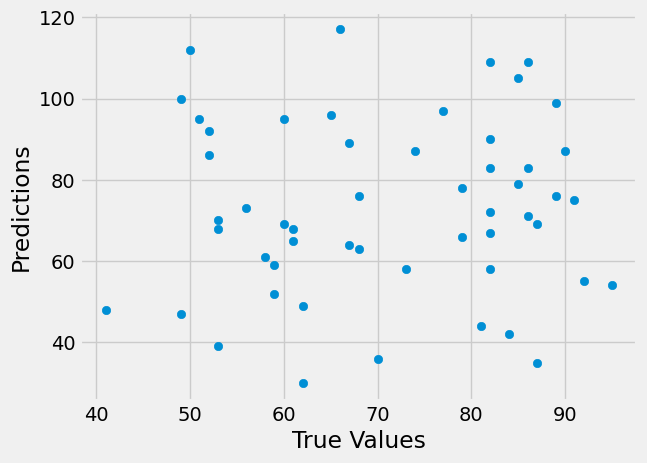

In [81]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()